# 1 - Import Librairies

In [6]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 573 µs (started: 2021-09-14 09:10:21 +00:00)


In [2]:
%%time
from imblearn.over_sampling import RandomOverSampler
import imblearn
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pkg_resources
import seaborn as sns
import time
import types
import warnings
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2,f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from IPython.core.display import display, HTML
from IPython.display import Audio
from joblib import Parallel, delayed, parallel_backend
from lightgbm import LGBMModel,LGBMClassifier
from scipy import interp
from scipy import stats
from sklearn import model_selection, naive_bayes, svm,datasets
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
#from sklearn.experimental import enable_halving_search_cv 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression,Ridge 
from sklearn.metrics import accuracy_score,  roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score,roc_curve, auc,roc_auc_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score, GridSearchCV,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,PolynomialFeatures,KBinsDiscretizer,QuantileTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier
import sklearn.metrics as metrics
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingGridSearchCV 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix
from sklearn import metrics
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import lime.lime_tabular
import lime

import xgboost
import shap
shap.initjs()
import plotly.express as px
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix
import itertools
from sklearn.feature_selection import SelectorMixin
# sklearn.feature_extraction import VectorizerMixin
display(HTML("<style>.container { width:100% !important; }</style>"))

warnings.filterwarnings('ignore')
    
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))
    
print('The scikit-learn version is {}.'.format(sklearn.__version__)) 

xgboost==1.4.2
tqdm==4.61.1
shap==0.39.0
seaborn==0.11.1
scipy==1.6.3
scikit-learn==0.23.2
plotly==5.1.0
pandas==1.2.4
numpy==1.19.5
matplotlib==3.4.2
lime==0.2.0.1
lightgbm==3.2.1
joblib==1.0.1
The scikit-learn version is 0.23.2.
CPU times: user 4.36 s, sys: 1.46 s, total: 5.82 s
Wall time: 11.6 s


# 2 - Import Func

In [3]:

def _fini(xxxSoundxxx):
    return Audio(xxxSoundxxx, autoplay=True)


tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    return print("temps de traitement       ",round(duration1/60,2), "minutes")


tempsX = time.time()
def _time_now_():
    duration1 = time.time()-tempsX
    return round(duration1/60,2)

def _All_Sc_(_pred_, _org_) : 
    accuracy = accuracy_score(_pred_, _org_)
    precision = precision_score(_pred_, _org_)
    recall = recall_score(_pred_, _org_)
    f1 = f1_score(_pred_, _org_)
    kappa = cohen_kappa_score(_pred_, _org_)
    auc = roc_auc_score(_pred_, _org_)
    matrix = confusion_matrix(_pred_, _org_)
    print('>>> Accuracy : ', accuracy)
    print('>>> >>> precision : ', precision)
    print('>>> >>> >>> recall : ', recall)
    print('>>> >>> >>> >>> >>> f1 : ', f1 )
    print('>>> >>> >>> >>> >>> >>> kappa : ',kappa)
    print('>>> >>> >>> >>> >>> >>> >>> auc : ', auc)
    print('>>> matrix : ', matrix)
tempsX = time.time()
def _time_t_():
    duration1 = time.time()-tempsX
    return round(duration1/60,2)

def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return print('Cellules Vides : ', all_empty_cell, '%')

def _data_info_(data):
    mEmptyCell(data)
    print ('DataShape : ', data.shape)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    ORANGE = '\033[97m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def _grid_(model,param, X_train, y_train):
    pipe =  imbpipeline(steps = [('transform', preprocessor),
                    ('smote', SMOTE(random_state=11,sampling_strategy=0.99)),
                   ('model', model)])
    
    
    grid = GridSearchCV(pipe, param, scoring = 'roc_auc',cv=2, verbose=7, n_jobs=-1)
    grid.fit(X_train, y_train) 
    print('*******************' ,str(model) ,'********************' )
    print('*****      best_score_ ' , grid.best_score_ , '*********')
    #print('****   best_estimator_' , grid.best_estimator_ , '******')
    print('**** grid.best_params_ ' ,grid.best_params_ ,    '******')
    
    
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
    


def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

def _type_com(df):
    _type_ = pd.DataFrame(df.dtypes).reset_index()
    _type_ = _type_.rename(columns={'index': "_Col_Name_", 0 : "_type_" }) 
    _type_.loc[_type_['_type_'] == 'int64',  '_type_'] = "num"
    _type_.loc[_type_['_type_'] == 'float64',  '_type_'] = "num"
    _type_.loc[_type_['_type_'] == 'object',  '_type_'] = "cat"
    _type_ = _type_.drop(_type_[_type_._Col_Name_  == 'SK_ID_CURR'].index)
    _type_ = _type_.drop(_type_[_type_._Col_Name_  == 'TARGET'].index)
    numeric_features = _type_.loc[_type_['_type_'] == 'num']._Col_Name_.values
    categorical_features = _type_.loc[_type_['_type_'] == 'cat']._Col_Name_.values
    return numeric_features, categorical_features

def _Best_Model_(_pred_, seuil,y_test): 
    _pred_ = pd.DataFrame(_pred_)
    _pred_ = _pred_.rename(columns={0 : "probs_" })
    _pred_['_my_tar_'] = np.where(_pred_["probs_"] <= seuil, 0, 1)
    _pred_.pop('probs_')
    _pred_ = _pred_._my_tar_.values
    auc = roc_auc_score(y_test, _pred_)
    accuracy = accuracy_score(y_test, _pred_)
    precision = precision_score(y_test, _pred_)
    recall = recall_score(y_test, _pred_)
    f1 = f1_score(_pred_, y_test)
    kappa = cohen_kappa_score(y_test, _pred_)
    roc_auc_sc = roc_auc_score(y_test, _pred_)   
    cf_mtx = confusion_matrix(y_test, _pred_)
    true_0 = cf_mtx[0][0]
    false_0 = cf_mtx[0][1]
    true_1 = cf_mtx[1][1]
    false_1 = cf_mtx[1][0]
    data = {'seuil':seuil,
            'roc_auc_sc': roc_auc_sc,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'true_0': true_0,
            'false_0': false_0,
            'true_1': true_1,
            'false_1': false_1,
            'Durée':str(_time_now_())}   
    return data

def _df_res(data_s):
    mBos = pd.DataFrame(data_s)
    mBos["_%_al_1"] = mBos["ba_1"] / mBos["al_1"]
    mBos["_%_tr_1"] = mBos["tr_1"] / mBos["al_1"]
    mBos_filtr_1 = mBos[(mBos['_%_tr_1'] > 0.29) & (mBos['_%_tr_1'] < 1)]
    mBos_filtr_1 = mBos_filtr_1[(mBos_filtr_1['_%_al_1'] > 0.8) & (mBos_filtr_1['_%_al_1'] < 1.2)]
    mBos_filtr_1 = mBos_filtr_1.sort_values(by=['_%_al_1'], ascending=False)
    mBos_filtr_1.pop('a_0')
    mBos_filtr_1.pop('tr_0')
    mBos_filtr_1.pop('fa_0')
    mBos_filtr_1.pop('b_0')
    return mBos_filtr_1


def PermImportance(X, y, clf, metric, num_iterations=5):
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
    return baseline_metric, scores

# 3 - Import Data

In [4]:

m_App_Test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')
m_App_Train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
m_App_Train.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

# 4 - Clean

In [5]:


m_App_Train_211 = m_App_Train.copy()

# By Col ----------------------------------

print(m_App_Train_211.shape)
empty_Col = pd.DataFrame(m_App_Train_211.isnull().sum())
empty_Col = empty_Col.reset_index()
empty_Col = empty_Col.rename(columns={'index': "_Col_Name_", 0 : "_count_" })
empty_Col = empty_Col.sort_values(by=['_count_'], ascending=True)
empty_Col['_%_count'] = empty_Col['_count_']  / empty_Col['_count_'].max()
empty_Col = empty_Col.loc[empty_Col['_%_count'] < 0.49]
_k_ = empty_Col._Col_Name_
m_App_Train_211  = m_App_Train_211[_k_]
print(" Shape ---> " , m_App_Train_211.shape)


# By Row ----------------------------------

m_App_Train_212 = m_App_Train_211.copy()
print(m_App_Train_212.shape)
empty_Row  = pd.DataFrame(m_App_Train_211.isnull().sum(axis=1))
empty_Row = empty_Row.rename(columns={0 : "_count_" })
empty_Row['_%_count'] = empty_Row['_count_']  / empty_Row['_count_'].max()
empty_Row = empty_Row.loc[empty_Row['_%_count'] < 0.49]
empty_Row = empty_Row.reset_index()
_k_ = empty_Row['index']
_k_ = _k_.to_list()
m_App_Train_212 = m_App_Train_212.iloc[_k_]
print(" Shape ---> " , m_App_Train_212.shape)



# Outliers ----------------------------------


m_App_Train_213 = m_App_Train_212.copy()
print(m_App_Train_213.shape)

numeric_features, categorical_features=  _type_com(m_App_Train_213)
m_App_Train_213_id = m_App_Train_213.pop('SK_ID_CURR')
m_App_Train_213_target = m_App_Train_213.pop('TARGET')
m_App_Train_213_cat = m_App_Train_213[categorical_features]
m_App_Train_213_num = m_App_Train_213[numeric_features]

print(m_App_Train_213_num.shape)
m_App_Train_213_num = m_App_Train_213_num.fillna(0)
clf = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
m_App_Train_213_num_out = clf.fit_predict(m_App_Train_213_num)
_out_ = pd.DataFrame(m_App_Train_213_num_out, columns=["_OUT_"])

m_App_Train_213_ = pd.merge(m_App_Train_213_id,m_App_Train_213_target, left_index=True, right_index=True)
m_App_Train_213_ = pd.merge(m_App_Train_213_cat,m_App_Train_213_, left_index=True, right_index=True)
m_App_Train_213_ = pd.merge(m_App_Train_213_num,m_App_Train_213_, left_index=True, right_index=True)
m_App_Train_213_ = m_App_Train_213_.reset_index()
m_App_Train_213_ = pd.merge(_out_,m_App_Train_213_, left_index=True, right_index=True)
m_App_Train_213_.pop('index')
print(m_App_Train_213_.shape)
m_App_Train_213_f = m_App_Train_213_[(m_App_Train_213_['_OUT_'] == 1)]
m_App_Train_213_f.pop('_OUT_')
m_App_Train_213 = m_App_Train_213_f.copy()


m_App_Train_3 = m_App_Train_213.copy()
print('ok')

(307511, 122)
 Shape --->  (307511, 73)
(307511, 73)
 Shape --->  (265965, 73)
(265965, 73)
(265965, 59)
(265965, 74)
ok


# 5 - Features Eng

(240333, 73)
(198452, 73)


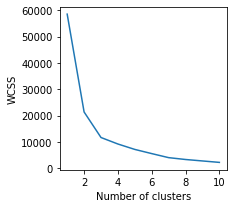

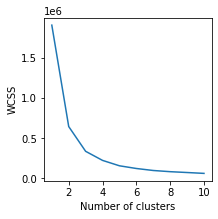

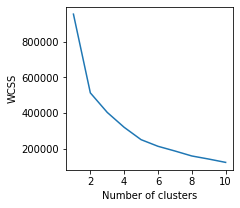

In [6]:


# 1 - DAYS_BIRTH ----------------------------------

m_App_Train_3["DAYS_BIRTH"] = m_App_Train_3["DAYS_BIRTH"] / -365 

# 2 - DAYS_EMPLOYED ----------------------------------

print(m_App_Train_3.shape)
m_App_Train_3['DAYS_EMPLOYED'] = np.where((m_App_Train_3.DAYS_EMPLOYED > 0),m_App_Train_3.DAYS_EMPLOYED*-1,m_App_Train_3.DAYS_EMPLOYED)
m_App_Train_3['DAYS_EMPLOYED'] = m_App_Train_3['DAYS_EMPLOYED']/ - 365
m_App_Train_3 = m_App_Train_3.drop(m_App_Train_3[m_App_Train_3.DAYS_EMPLOYED > 70].index)
print(m_App_Train_3.shape)

# 3 - _ratio_income_credit_ ----------------------------------

m_App_Train_3["_ratio_income_credit_"]  = round(m_App_Train_3['AMT_INCOME_TOTAL'] / m_App_Train_3['AMT_CREDIT'],20)

# 4 - _ratio_income_annuity ----------------------------------

m_App_Train_3["_ratio_income_annuity"]  = round(m_App_Train_3['AMT_INCOME_TOTAL'] / m_App_Train_3['AMT_ANNUITY'],20)

# 5 - _duree_credit_ ----------------------------------

m_App_Train_3["_duree_credit_"]         = round(m_App_Train_3['AMT_CREDIT'] / m_App_Train_3['AMT_ANNUITY'],20)

# 6 - _interet_----------------------------------

m_App_Train_3['_interet_'] = m_App_Train_3['AMT_CREDIT'] - m_App_Train_3['AMT_GOODS_PRICE']

# 7 - _interet_par_années_ ----------------------------------

m_App_Train_3['_interet_par_année_'] = m_App_Train_3['_interet_'] / m_App_Train_3['_duree_credit_']

# 8 - _%_interet ----------------------------------

m_App_Train_3['_%_interet'] = round((m_App_Train_3['AMT_CREDIT']*m_App_Train_3['_duree_credit_']*(1/m_App_Train_3['_interet_']))/100,2)

# 9 - Part Fiscale----------------------------------

m_App_Train_3['_part_'] = m_App_Train_3['CNT_FAM_MEMBERS'] - (m_App_Train_3['CNT_CHILDREN']/2)

# 10 - Ratio Part fiscale----------------------------------

m_App_Train_3['_part_Income'] = m_App_Train_3['AMT_INCOME_TOTAL'] / m_App_Train_3['_part_'] 

# 11 - endettement----------------------------------

m_App_Train_3['endettement'] = (m_App_Train_3['AMT_CREDIT']/ m_App_Train_3['_duree_credit_']/12)  / (m_App_Train_3['AMT_INCOME_TOTAL']/12) 


# 12 - FLAG_DOCUMENT ----------------------------------
m_App_Train_310 = m_App_Train_3.copy()



m_clus_1 = m_App_Train_310[['FLAG_DOCUMENT_21','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 
                            'FLAG_DOCUMENT_15','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10',
                            'FLAG_DOCUMENT_9','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 
                            'FLAG_DOCUMENT_3','FLAG_DOCUMENT_2']]

wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(m_clus_1)
    wcss.append(model.inertia_)
plt.figure(figsize=(3,3))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


lst = ['FLAG_DOCUMENT_21','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 
                            'FLAG_DOCUMENT_15','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10',
                            'FLAG_DOCUMENT_9','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 
                            'FLAG_DOCUMENT_3','FLAG_DOCUMENT_2']

for i in lst:
    m_App_Train_310.pop(i)
    
    
model = KMeans(n_clusters = 3, init = "k-means++")
m_App_Train_310['Cluster_doc'] = model.fit_predict(m_clus_1)

# 13 - CNT_SOCIAL_CIRCLE ----------------------------------

m_clus_2 = m_App_Train_310[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']]
                          
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(m_clus_2)
    wcss.append(model.inertia_)
plt.figure(figsize=(3,3))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

lst = ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']

for i in lst:
    m_App_Train_310.pop(i)

model = KMeans(n_clusters = 2, init = "k-means++")
m_App_Train_310['Cluster_Social_C'] = model.fit_predict(m_clus_2)

# 14 - AMT_REQ_CREDIT_BUREAU_ ----------------------------------

m_clus_3 = m_App_Train_310[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',]]

                          
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(m_clus_3)
    wcss.append(model.inertia_)
plt.figure(figsize=(3,3))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

lst = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',]

for i in lst:
    m_App_Train_310.pop(i)

model = KMeans(n_clusters = 2, init = "k-means++")
m_App_Train_310['Cluster_time_bureau'] = model.fit_predict(m_clus_2)


m_App_Train_3 = m_App_Train_310.copy()


# 6 - Refactoring 

In [7]:


m_Data = m_App_Train_3.copy()
m_Data = m_Data.fillna(0)

# 1 - NAME_EDUCATION_TYPE ----------------------------------

m_1 = [ (m_Data['NAME_EDUCATION_TYPE'] =='Higher education'),
        (m_Data['NAME_EDUCATION_TYPE'] =='Incomplete higher'),             
        (m_Data['NAME_EDUCATION_TYPE'] =='Lower secondary'),               
        (m_Data['NAME_EDUCATION_TYPE'] =='Academic degree'),
        (m_Data['NAME_EDUCATION_TYPE'] =='Secondary / secondary special')]
m_2 = ["Higher", "Secondary", "Low" , "Higher", "Secondary"]
m_Data['NAME_EDUCATION_TYPE'] = np.select(m_1, m_2)

# 2 - OCCUPATION_TYPE ----------------------------------

m_1 = [ (m_Data['OCCUPATION_TYPE'] =='Sales staff'),
        (m_Data['OCCUPATION_TYPE'] =='Laborers'),
        (m_Data['OCCUPATION_TYPE'] =='Drivers'),
        (m_Data['OCCUPATION_TYPE'] =='Realty agents'),
        (m_Data['OCCUPATION_TYPE'] =='Private service staff'),
        (m_Data['OCCUPATION_TYPE'] =='Cooking staff'),
        (m_Data['OCCUPATION_TYPE'] =='Waiters/barmen staff'),
        (m_Data['OCCUPATION_TYPE'] =='Managers'),
        (m_Data['OCCUPATION_TYPE'] =='Cleaning staff'),
        (m_Data['OCCUPATION_TYPE'] =='IT staff'),
        (m_Data['OCCUPATION_TYPE'] =='HR staff'),
        (m_Data['OCCUPATION_TYPE'] =='Secretaries'),
        (m_Data['OCCUPATION_TYPE'] =='Accountants'),
        (m_Data['OCCUPATION_TYPE'] =='Low-skill Laborers'),
        (m_Data['OCCUPATION_TYPE'] =='High skill tech staff'),
        (m_Data['OCCUPATION_TYPE'] =='Security staff'),
        (m_Data['OCCUPATION_TYPE'] =='Core staff'),
        (m_Data['OCCUPATION_TYPE'] =='Medicine staff')]
m_2 = ["CSP_2","CSP_1","CSP_2",'CSP_3','CSP_2','CSP_2','CSP_2','CSP_3','CSP_1','CSP_3','CSP_3','CSP_2','CSP_2','CSP_1','CSP_3','CSP_2','CSP_2','CSP_3' ]
m_Data['OCCUPATION_TYPE'] = np.select(m_1, m_2)

# 3 - NAME_INCOME_TYPE ----------------------------------

m_1 = [ (m_Data['NAME_INCOME_TYPE'] =='Unemployed'),
        (m_Data['NAME_INCOME_TYPE'] =='State servant'),
        (m_Data['NAME_INCOME_TYPE'] =='Working'),
        (m_Data['NAME_INCOME_TYPE'] =='Maternity leave'),
        (m_Data['NAME_INCOME_TYPE'] =='Pensioner '),
        (m_Data['NAME_INCOME_TYPE'] =='Student'),
        (m_Data['NAME_INCOME_TYPE'] =='Businessman'),
        (m_Data['NAME_INCOME_TYPE'] =='Managers'),
        (m_Data['NAME_INCOME_TYPE'] =='Commercial associate')]

m_2 = ['Unemployed',"Working",'Working','Unemployed','Unemployed','Unemployed','Working','Working', 'Working']

m_Data['NAME_INCOME_TYPE'] = np.select(m_1, m_2)

# 4 - NAME_HOUSING_TYPE ----------------------------------

m_1 = [ (m_Data['NAME_HOUSING_TYPE'] =='Office apartment'),
        (m_Data['NAME_HOUSING_TYPE'] =='With parents'),             
        (m_Data['NAME_HOUSING_TYPE'] =='Municipal apartment'),               
        (m_Data['NAME_HOUSING_TYPE'] =='House / apartment'),
        (m_Data['NAME_HOUSING_TYPE'] =='Rented apartment'),
        (m_Data['NAME_HOUSING_TYPE'] =='Co-op apartment')]

m_2 = ['Other', 'Other', 'Other' , 'apartment/house', 'Other', 'Other']

m_Data['NAME_HOUSING_TYPE'] = np.select(m_1, m_2)

m_App_Train_3 = m_Data.copy()

m_App_Train_3.replace([np.inf,np.nan],0,inplace=True)
m_App_Train_3['NAME_TYPE_SUITE'] = m_App_Train_3['NAME_TYPE_SUITE'].astype(str)
m_App_Train_3['OCCUPATION_TYPE'] = m_App_Train_3['OCCUPATION_TYPE'].astype(str)


mData = m_App_Train_3.copy()
print("ok")

ok


In [8]:
mData.to_csv('mDataX.csv', index=False)

# 7 - NEUTRE

### 7.A - Logistic ---------------------------------------------------

In [9]:
%%time
# Wall time: 5min 4s
# Logistic  ----------------------------------

mDataL = mData.copy()


mDataL.pop('SK_ID_CURR')
y = mDataL.pop('TARGET')
X = mDataL

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('Logistic NEUTRE')
print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=25)),
       ('classifier', LogisticRegression(solver='liblinear', random_state=0))]

pipe_def_rf = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_rf.fit(X_train ,y_train)
print('fit ---> ok ')

preds_ = pipe_def_rf.predict(X_test)
print("X_test   " , X_test.shape)
print("y_test   " , y_test.shape)
print("preds_   " , preds_.shape)

print("================= Accuracy =================")
acc = accuracy_score(y_test, preds_)
print(" acc  : " ,acc )
print("================= ROC =================")
roc = roc_auc_score(y_test, preds_)
print(" roc  : " ,roc )
print("================= Confusion Mtx =================")
cf_mtx = confusion_matrix(y_test, preds_)
print(" cf_mtx  : " ,cf_mtx )
print('===================================================')

# Test 1/2
a = pipe_def_rf.predict(X)
a = pd.DataFrame(a)
a = a.rename(columns={0 : "pred" })

b = pd.concat([a, y], axis=1)
b['_compare_'] = np.where(b['pred'] == b['TARGET'], "ok", "no")
print(b._compare_.value_counts())
print(b.pred.value_counts())
print(b.TARGET.value_counts())


X_train    (289861, 53)
X_test    (72466, 53)
y_train    (289861,)
y_test    (72466,)
Logistic NEUTRE
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 
fit ---> ok 
X_test    (72466, 53)
y_test    (72466,)
preds_    (72466,)
================= Accuracy =================
 acc  :  0.6721772969392543
================= ROC =================
 roc  :  0.6721730024025874
================= Confusion Mtx =================
 cf_mtx  :  [[24496 11893]
 [11863 24214]]
no    157118
ok     91798
Name: _compare_, dtype: int64
0.0    127773
1.0     70679
Name: pred, dtype: int64
0.0    182074
1.0     16378
Name: TARGET, dtype: int64
CPU times: user 6min 23s, sys: 5.36 s, total: 6min 28s
Wall time: 6min 27s
time: 6min 27s (started: 2021-09-13 19:03:17 +00:00)


### 7.B - Random ---------------------------------------------------

In [10]:
%%time
# time: 8min 27s
# Random F ----------------------------------

mDataF = mData.copy()

mDataF.pop('SK_ID_CURR')
y = mDataF.pop('TARGET')
X = mDataF

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('RandomForestClassifier NEUTRE')
print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=25)),('classifier', RandomForestClassifier(n_estimators=100))]

pipe_def_rf = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_rf.fit(X_train ,y_train)
print('fit ---> ok ')

preds_ = pipe_def_rf.predict(X_test)
print("X_test   " , X_test.shape)
print("y_test   " , y_test.shape)
print("preds_   " , preds_.shape)

print("================= Accuracy =================")
acc = accuracy_score(y_test, preds_)
print(" acc  : " ,acc )
print("================= ROC =================")
roc = roc_auc_score(y_test, preds_)
print(" roc  : " ,roc )
print("================= Confusion Mtx =================")
cf_mtx = confusion_matrix(y_test, preds_)
print(" cf_mtx  : " ,cf_mtx )
print('===================================================')

# Test 1/2
a = pipe_def_rf.predict(X)
a = pd.DataFrame(a)
a = a.rename(columns={0 : "pred" })

b = pd.concat([a, y], axis=1)
b['_compare_'] = np.where(b['pred'] == b['TARGET'], "ok", "no")
print(b._compare_.value_counts())
print(b.pred.value_counts())
print(b.TARGET.value_counts())

X_train    (289861, 53)
X_test    (72466, 53)
y_train    (289861,)
y_test    (72466,)
RandomForestClassifier NEUTRE
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 
fit ---> ok 
X_test    (72466, 53)
y_test    (72466,)
preds_    (72466,)
================= Accuracy =================
 acc  :  0.9964673088068887
================= ROC =================
 roc  :  0.9964824534886916
================= Confusion Mtx =================
 cf_mtx  :  [[36133   256]
 [    0 36077]]
ok    125279
no    123637
Name: _compare_, dtype: int64
0.0    181818
1.0     16634
Name: pred, dtype: int64
0.0    182074
1.0     16378
Name: TARGET, dtype: int64
CPU times: user 8min 23s, sys: 5.01 s, total: 8min 28s
Wall time: 8min 27s
time: 8min 27s (started: 2021-09-13 19:09:45 +00:00)


In [11]:
%%time
# time: 5min 56s 



# Random F ----------------------------------

mDataF = mData.copy()

mDataF.pop('SK_ID_CURR')
y = mDataF.pop('TARGET')
X = mDataF

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('RandomForestClassifier NEUTRE')
print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=25)),('classifier', RandomForestClassifier(n_estimators=10))]

pipe_def_rf = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_rf.fit(X_train ,y_train)
print('fit ---> ok ')

preds_ = pipe_def_rf.predict(X_test)
print("X_test   " , X_test.shape)
print("y_test   " , y_test.shape)
print("preds_   " , preds_.shape)

print("================= Accuracy =================")
acc = accuracy_score(y_test, preds_)
print(" acc  : " ,acc )
print("================= ROC =================")
roc = roc_auc_score(y_test, preds_)
print(" roc  : " ,roc )
print("================= Confusion Mtx =================")
cf_mtx = confusion_matrix(y_test, preds_)
print(" cf_mtx  : " ,cf_mtx )
print('===================================================')

# Test 1/2
a = pipe_def_rf.predict(X)
a = pd.DataFrame(a)
a = a.rename(columns={0 : "pred" })

b = pd.concat([a, y], axis=1)
b['_compare_'] = np.where(b['pred'] == b['TARGET'], "ok", "no")
print(b._compare_.value_counts())
print(b.pred.value_counts())
print(b.TARGET.value_counts())

X_train    (289861, 53)
X_test    (72466, 53)
y_train    (289861,)
y_test    (72466,)
RandomForestClassifier NEUTRE
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 
fit ---> ok 
X_test    (72466, 53)
y_test    (72466,)
preds_    (72466,)
================= Accuracy =================
 acc  :  0.9921894405652306
================= ROC =================
 roc  :  0.9922218550451684
================= Confusion Mtx =================
 cf_mtx  :  [[35832   557]
 [    9 36068]]
ok    125064
no    123852
Name: _compare_, dtype: int64
0.0    181500
1.0     16952
Name: pred, dtype: int64
0.0    182074
1.0     16378
Name: TARGET, dtype: int64
CPU times: user 5min 53s, sys: 3.17 s, total: 5min 57s
Wall time: 5min 56s
time: 5min 56s (started: 2021-09-13 19:18:12 +00:00)


### 7.C - XGB ---------------------------------------------------

In [12]:
%%time
#time: 6min 27s
# XGBoost  ----------------------------------

mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('RandomForestClassifier NEUTRE')
print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=25)),
        ('classifier', XGBClassifier(objective='binary:logistic',
                                    eval_metric= 'auc'))]

pipe_def_rf = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_rf.fit(X_train ,y_train)
print('fit ---> ok ')

preds_ = pipe_def_rf.predict(X_test)
print("X_test   " , X_test.shape)
print("y_test   " , y_test.shape)
print("preds_   " , preds_.shape)

print("================= Accuracy =================")
acc = accuracy_score(y_test, preds_)
print(" acc  : " ,acc )
print("================= ROC =================")
roc = roc_auc_score(y_test, preds_)
print(" roc  : " ,roc )
print("================= Confusion Mtx =================")
cf_mtx = confusion_matrix(y_test, preds_)
print(" cf_mtx  : " ,cf_mtx )
print('===================================================')

# Test 1/2
a = pipe_def_rf.predict(X)
a = pd.DataFrame(a)
a = a.rename(columns={0 : "pred" })

b = pd.concat([a, y], axis=1)
b['_compare_'] = np.where(b['pred'] == b['TARGET'], "ok", "no")
print(b._compare_.value_counts())
print(b.pred.value_counts())
print(b.TARGET.value_counts())


X_train    (289861, 53)
X_test    (72466, 53)
y_train    (289861,)
y_test    (72466,)
RandomForestClassifier NEUTRE
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 
fit ---> ok 
X_test    (72466, 53)
y_test    (72466,)
preds_    (72466,)
================= Accuracy =================
 acc  :  0.7680291447023432
================= ROC =================
 roc  :  0.7681085004951985
================= Confusion Mtx =================
 cf_mtx  :  [[27280  9109]
 [ 7701 28376]]
no    148518
ok    100398
Name: _compare_, dtype: int64
0.0    141642
1.0     56810
Name: pred, dtype: int64
0.0    182074
1.0     16378
Name: TARGET, dtype: int64
CPU times: user 7min 46s, sys: 3.1 s, total: 7min 49s
Wall time: 6min 27s
time: 6min 27s (started: 2021-09-13 19:24:08 +00:00)


# 8 -  SEARCH HP

### 8.A - HP - Function ---------------------------------------------------

In [13]:


def _random(string, model, param_dist,X_train, X_test, y_train, y_test,numeric_features, categorical_features):
    print('.')
    numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),('scale', StandardScaler()),('Discretization', KBinsDiscretizer(n_bins=1000, encode='ordinal', strategy='uniform'))])
    print('..')
    categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
    print('...')
    preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])
    print('....')
    steps=[('transform', preprocessor),('selector', SelectKBest()),('model', model)]
    print('.....')
    pipe_def = Pipeline(steps)
    print('......')
    random_search = RandomizedSearchCV(pipe_def, param_dist,cv = 2,  n_iter = 10, scoring = 'roc_auc', error_score = 0, verbose = 1, n_jobs = -1)
    print('.......')
    random_search.fit(X_train,y_train)
    print('============================================================================')
    print(random_search.best_score_)
    print('============================================================================')
    print(random_search.best_params_)
    print('============================================================================') 
    return random_search.best_score_

time: 1.85 ms (started: 2021-09-13 19:30:36 +00:00)


### 8.B - HP - Logistic ---------------------------------------------------

In [14]:
%%time

# time: 56min 31s

mDataL = mData.copy()

mDataL.pop('SK_ID_CURR')
y = mDataL.pop('TARGET')
X = mDataL

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)



param_dist = {'selector__k': stats.randint(50, 80),
               'model__penalty' : ['l1', 'l2'],
               'model__C' : np.logspace(-4, 4, 20),
               'model__solver' : ['liblinear']}

model = LogisticRegression(solver='liblinear', random_state=0)



Log_Reg_HP =  _random(" HP Logistic ", model, param_dist,X_train, X_test, y_train, y_test,numeric_features, categorical_features)



.
..
...
....
.....
......
.......
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 40.4min finished


0.7335059582438859
{'model__C': 78.47599703514607, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'selector__k': 78}
CPU times: user 16min 25s, sys: 4.7 s, total: 16min 30s
Wall time: 56min 31s
time: 56min 31s (started: 2021-09-13 19:30:36 +00:00)


# 8.B - HP -   RandomForestClassifier -----------------------------------------

In [15]:
%%time

#time: 38min 51s

mDataF = mData.copy()

mDataF.pop('SK_ID_CURR')
y = mDataF.pop('TARGET')
X = mDataF

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)



param_dist = {'selector__k': stats.randint(50, 80),
               'model__bootstrap': [True, False],
               'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'model__max_features': ['auto', 'sqrt'],
               'model__min_samples_leaf': [1, 2, 4],
               'model__min_samples_split': [2, 5, 10],
               'model__n_estimators': [130, 180, 230]}

model = RandomForestClassifier(n_estimators=100)

Ran_For_HP = _random(" HP Forest ", model, param_dist,X_train, X_test, y_train, y_test,numeric_features, categorical_features)


.
..
...
....
.....
......
.......
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 27.8min finished


0.9965174347551333
{'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 230, 'selector__k': 63}
CPU times: user 11min 18s, sys: 5.21 s, total: 11min 23s
Wall time: 38min 51s
time: 38min 51s (started: 2021-09-13 20:27:08 +00:00)


### 8.C - - HP - XGB ---------------------------------------------------

In [16]:
%%time
#time: 31min 21s

mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)


param_dist = {'selector__k': stats.randint(50, 80),
              'model__alpha': stats.uniform(0.1, 0.5),
              'model__gamma': stats.uniform(0.1, 0.5),
              'model__learning_rate': stats.uniform(0.01, 0.2),
              'model__subsample':[0.65, 0.7, 0.75 ,0.8], 
              'model__max_depth': stats.randint(4, 6),
              'model__min_child_weight': stats.randint(4, 6)}

model = XGBClassifier(objective='binary:logistic',eval_metric= 'auc')

Xgb_Class_HP = _random(" HP XGB ", model, param_dist,X_train, X_test, y_train, y_test,numeric_features, categorical_features)

.
..
...
....
.....
......
.......
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 25.1min finished


0.7889775695679977
{'model__alpha': 0.5369662955983797, 'model__gamma': 0.24739935390427295, 'model__learning_rate': 0.10748345589258514, 'model__max_depth': 5, 'model__min_child_weight': 4, 'model__subsample': 0.75, 'selector__k': 53}
CPU times: user 8min 21s, sys: 4.16 s, total: 8min 26s
Wall time: 31min 21s
time: 31min 21s (started: 2021-09-13 21:05:59 +00:00)


# 9 - BEST MODEL 

In [17]:
mDataX = mData.copy()
mDataX.shape

(198452, 55)

time: 64.3 ms (started: 2021-09-13 21:37:21 +00:00)


In [18]:
%%time
# Wall time: 5min 22s

# XGBoost  ----------------------------------

mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)

print(X_over.shape)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

print(X_train.shape)
X_train.columns


(362327, 53)
(289861, 53)
CPU times: user 7.41 s, sys: 952 ms, total: 8.36 s
Wall time: 8.34 s


Index(['HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'CNT_CHILDREN', 'REGION_RATING_CLIENT', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'AMT_CREDIT',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'ORGANIZATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY',
       'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE',
       'OCCUPATION_TYPE', '_ratio_income_credit_', '_ratio_income_an

time: 8.35 s (started: 2021-09-13 21:37:21 +00:00)


In [19]:
%%time
# Wall time: 5min 22s

# XGBoost  ----------------------------------

mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('RandomForestClassifier NEUTRE')
print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

params = {'alpha': 0.23577333450393564, 
          'gamma': 0.1498597113894086, 
          'learning_rate': 0.20589612291341375, 
          'max_depth': 5, 
          'min_child_weight': 4, 
          'subsample': 0.8}

print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=50)),
        ('classifier', XGBClassifier(objective='binary:logistic',
                                    eval_metric= 'auc', **params))]

pipe_def_xg_Def = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_xg_Def.fit(X_train ,y_train)
print('fit ---> ok ')


probs_= pipe_def_xg_Def.predict_proba(X_test)
probs_ = probs_[:,1]
print("================================================================")
sc_ = roc_auc_score(y_test,probs_)
print("================= ROC ========== 1  =======")
print(" roc 1 : " , sc_ )


X_train    (289861, 53)
X_test    (72466, 53)
y_train    (289861,)
y_test    (72466,)
RandomForestClassifier NEUTRE
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 
fit ---> ok 
================= ROC ========== 1  =======
 roc 1 :  0.8142067630462672
CPU times: user 8min 16s, sys: 3.29 s, total: 8min 19s
Wall time: 6min 24s
time: 6min 24s (started: 2021-09-13 21:37:29 +00:00)


In [20]:
joblib_file = "finalized_model.pkl"  
joblib.dump(pipe_def_xg_Def, joblib_file)


['finalized_model.pkl']

time: 27.7 ms (started: 2021-09-13 21:43:53 +00:00)


In [21]:
%%time 

data_s = []
probs = pipe_def_xg_Def.predict_proba(X_test)
probs_ = probs[:,1]
probs_ = pd.DataFrame(probs_) 
for i in tqdm(range(100, 800)):
    i = i/1000
    probs_['_pred_'] = np.where(probs_[0] >= i , 1, 0)
    _pred_ = probs_._pred_
    cf_mtx = confusion_matrix(y_test, _pred_)
    true_0 = cf_mtx[0][0]
    false_1 = cf_mtx[0][1]
    true_1 = cf_mtx[1][1]
    false_0 = cf_mtx[1][0]
    y_test_df = pd.DataFrame(y_test)
    base_0 = y_test_df['TARGET'].value_counts()[0]
    base_1 = y_test_df['TARGET'].value_counts()[1]
    _tn_ = true_0*25
    _fn_ = false_0*-100
    _tp_ = true_1
    _fp_ = false_1*-33
    data = {'seuil':i,
            'base_0':base_0,
            'all_0':true_0+false_0,
            'true_0': true_0,
            'false_0': false_0,
            'base_1':base_1,
            'all_1':true_1+false_1,
            'true_1': true_1,
            'false_1': false_1,
            'my_metrics': _tn_ + _fn_ + _tp_ + _fp_}
    data_s.append(data)
    
    
confusion_df = pd.DataFrame(data_s)
confusion_df = confusion_df.sort_values(by=['my_metrics'], ascending=True)
confusion_df


# SEUIL : 0.362

100%|██████████| 700/700 [01:23<00:00,  8.41it/s]

CPU times: user 1min 24s, sys: 423 ms, total: 1min 24s
Wall time: 1min 24s


seuil  base_0  all_0  true_0  false_0  base_1  all_1  true_1  false_1  \
699  0.799   36389  64572   35412    29160   36077   7894    6917      977   
698  0.798   36389  64493   35404    29089   36077   7973    6988      985   
697  0.797   36389  64377   35384    28993   36077   8089    7084     1005   
696  0.796   36389  64301   35375    28926   36077   8165    7151     1014   
695  0.795   36389  64187   35359    28828   36077   8279    7249     1030   
..     ...     ...    ...     ...      ...     ...    ...     ...      ...   
289  0.389   36389  25657   21068     4589   36077  46809   31488    15321   
284  0.384   36389  25203   20780     4423   36077  47263   31654    15609   
292  0.392   36389  25939   21249     4690   36077  46527   31387    15140   
291  0.391   36389  25834   21190     4644   36077  46632   31433    15199   
290  0.390   36389  25741   21132     4609   36077  46725   31468    15257   

     my_metrics  
699    -2056024  
698    -2049317  
697    -2040781  
696    -2034536  
695    -2025566  
..          ...  
289     -406305  
284     -406243  
292     -406008  
291     -404784  
290     -404613  

[700 rows x 10 columns]

time: 1min 24s (started: 2021-09-13 21:43:54 +00:00)


# 10 - THRESOLD

### 10.1 - Method 1

In [8]:
%%script false --no-raise-error
probs = pipe_def_xg_Def.predict_proba(X_test)
probs_ = probs[:,1]
probs_['_pred_'] = np.where(probs_[0] >= i , 1, 0)



time: 19.1 ms (started: 2021-09-14 09:11:20 +00:00)


### 10.2 Method 2

100%|██████████| 192982/192982 [01:13<00:00, 2610.70it/s]
4it [00:00, 1402.43it/s]


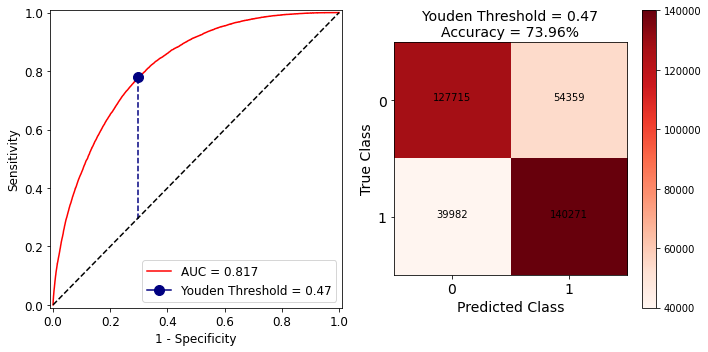

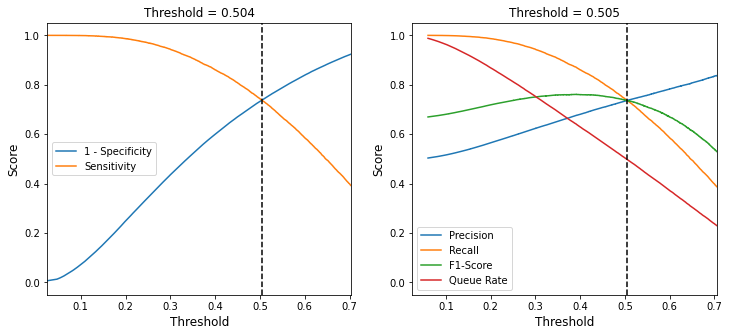

CPU times: user 1min 31s, sys: 2.78 s, total: 1min 33s
Wall time: 1min 31s
time: 1min 31s (started: 2021-09-13 21:45:20 +00:00)


In [23]:
%%time



mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)


def _threshold_finder(model, X, y_true):
    y_predict_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba)
    auc = roc_auc_score(y_true, y_predict_proba)
    precision, recall, thresholds2 = precision_recall_curve(y_true, y_predict_proba)
    
    class_names = [0, 1]
    youden_idx = np.argmax(np.abs(tpr - fpr))
    youden_threshold = thresholds[youden_idx]
    y_pred_youden = (y_predict_proba > youden_threshold).astype(int)
    cnf_matrix = confusion_matrix(y_true, y_pred_youden)
    np.set_printoptions(precision=2)
    
    f1 = []
    for i in range(len(precision)):
        f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
        
    queue_rate = []
    for thr in tqdm(thresholds2):
        queue_rate.append((y_predict_proba >= thr).mean()) 

    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color = "red", label = F"AUC = {auc:.3f}")
    plt.plot(fpr[youden_idx], tpr[youden_idx], marker = "o", color = "navy", ms =10, label =F"Youden Threshold = {youden_threshold:.2f}" )
    plt.axvline(x = fpr[youden_idx], ymin = fpr[youden_idx], ymax = tpr[youden_idx], color = "navy", ls = "--")
    plt.plot([0,1], [0,1] , color = "black", ls = "--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('1 - Specificity' , fontsize=12)
    plt.ylabel('Sensitivity' , fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend( prop={'size':12} , loc = 4)

    plt.subplot(1,2,2)
    _plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, cmap=plt.cm.Reds, title = F"Youden Threshold = {youden_threshold:.2f}\nAccuracy = {accuracy_score(y_true, y_pred_youden)*100:.2f}%")
    plt.show()
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1,2,1)
    plt.plot(thresholds, 1-fpr, label = "1 - Specificity")
    plt.plot(thresholds, tpr, label = "Sensitivity")
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds[np.argmin(abs(tpr + fpr - 1))]+0.2])
    plt.axvline(thresholds[np.argmin(abs(tpr + fpr - 1))], color="k", ls = "--")
    plt.title(F"Threshold = {thresholds[np.argmin(abs(tpr + fpr - 1))]:.3f}", fontsize = 12)
    
    plt.subplot(1,2,2)
    plt.plot(thresholds2, precision[1:], label = "Precision")
    plt.plot(thresholds2, recall[1:], label = "Recall")
    plt.plot(thresholds2, f1[1:], label = "F1-Score")
    plt.plot(thresholds2, queue_rate, label = "Queue Rate")
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds2[np.argmin(abs(precision-recall))] + 0.2])
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.axvline(thresholds2[np.argmin(abs(precision-recall))], color="k", ls = "--")
    plt.title(label = F"Threshold = {thresholds2[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
    plt.show()

#*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

def _plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in tqdm(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True Class', fontsize = 14)
    plt.xlabel('Predicted Class', fontsize = 14)

    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    
_threshold_finder(pipe_def_xg_Def, X_over, y_over)

# 11 - Features Importances

### 11.1 Aprés PreProcess

In [24]:
%%time
# time: 7min 45s 


t0 = _time_now_()

print('Go - Etape  0')
# Etape 1 - Process
m_St_A = pipe_def_xg_Def.steps[0][1]
mFit_step_A = pd.DataFrame(m_St_A.fit_transform(X), columns=get_ct_feature_names(preprocessor))
print('ok - Etape_1    -  ', round(_time_now_()-t0,2),' min'  )
# Etape 2 - Select K
m_St_B = pipe_def_xg_Def.steps[1][1]
mFit_step_B = m_St_B.fit_transform(mFit_step_A, y)
column_names = mFit_step_A.columns[m_St_B.get_support()]
mFit_step_B = pd.DataFrame(mFit_step_B, columns=column_names)
print('ok - Etape_2    -  ',round(_time_now_()-t0,2),' min'  )
# Etape 3 - XGBoost
m_St_C = pipe_def_xg_Def.steps[2][1]
mFit_step_C = m_St_C.fit(mFit_step_B, y)
f_e_ = pd.DataFrame(mFit_step_C.feature_importances_)
column_names_fe = pd.DataFrame(mFit_step_B.columns)
print('ok - Etape_3    -  ', round(_time_now_()-t0,2),' min'  )
# FEATURE IMPORTANCE - LA TOTALE
f_e_def = pd.merge(f_e_, column_names_fe, on=f_e_.index)
f_e_def = f_e_def.rename(columns={"0_x": '_score_', '0_y': '_col_name_'   })
f_e_def.pop('key_0')
f_e_def = f_e_def.sort_values(by=['_score_'], ascending=False) 

fig_0 = px.bar(f_e_def, x='_col_name_', y='_score_')
fig_0.show()

print('ok - plotly *1     -  ', round(_time_now_()-t0,2),' min'  )

baseline, scores = PermImportance(mFit_step_B, y, m_St_C, roc_auc_score, 10)
print('ok - Etape_4    -  ', round(_time_now_()-t0,2),' min'  )
percent_changes={c:[] for c in mFit_step_B.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)
print('ok - Etape_5    -  ', round(_time_now_()-t0,2),' min'  )
        
fig_1 = px.bar(pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25], 
        x='variable', 
        y='value', 
        labels={'variable':'column', 'value':'% change in recall'})
fig_1.show()


Go - Etape  0
ok - Etape_1    -   2.19  min
ok - Etape_2    -   2.2  min
ok - Etape_3    -   2.67  min


ok - plotly *1     -   2.69  min
ok - Etape_4    -   7.74  min
ok - Etape_5    -   7.74  min


CPU times: user 14min 51s, sys: 2.59 s, total: 14min 54s
Wall time: 7min 45s
time: 7min 45s (started: 2021-09-13 21:46:51 +00:00)


### 11.2 Avant PreProcess

-->
Go - Etape_1
ok - Etape_2    -   0.0  min
ok - Etape_3    -   0.14  min
(362327, 12)
(362327, 38)
ok - Etape_4    -   0.15  min
ok - Etape_5    -   0.15  min
ok - Etape_6    -   0.18  min
ok - Etape_7    -   0.18  min
ok - Etape_8    -   8.84  min
ok - Etape_9    -   8.86  min
ok - Etape_10    -   9.71  min


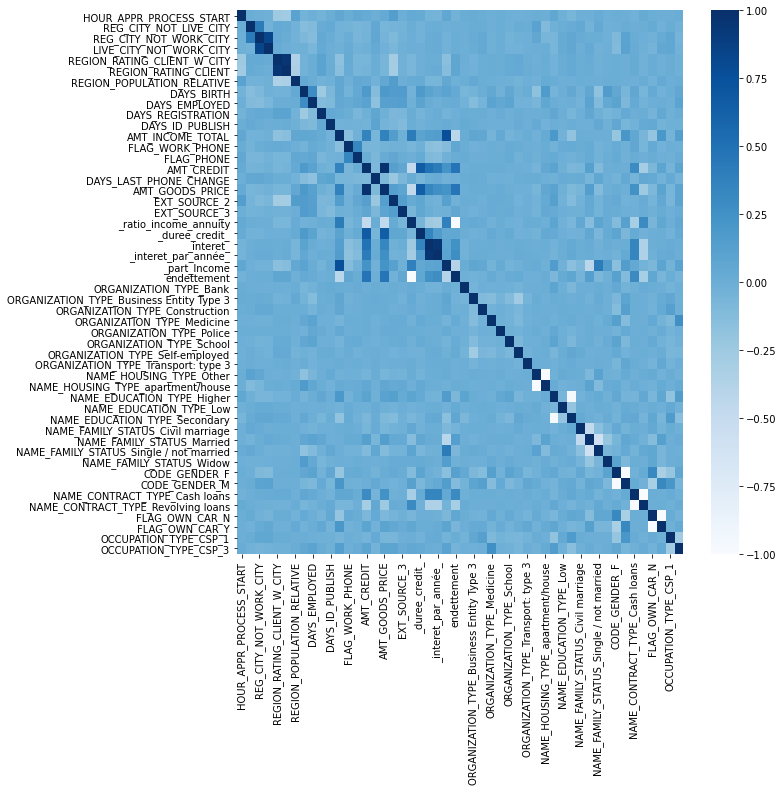

ok - Etape_11    -   9.78  min


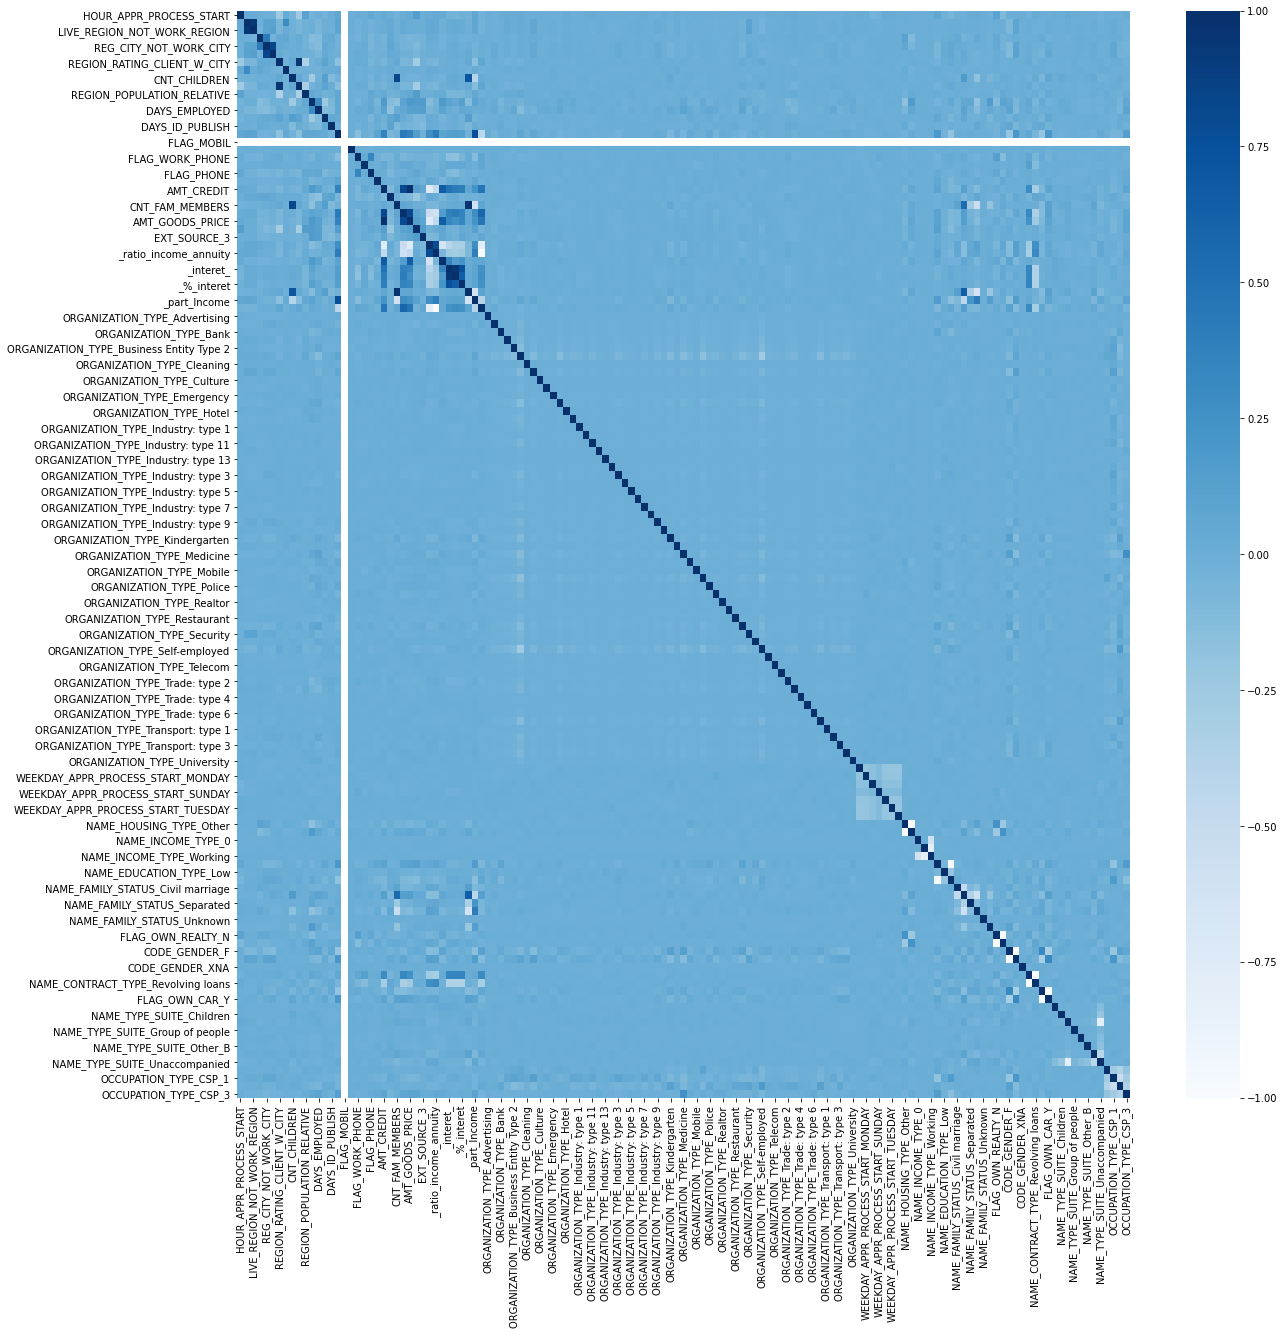

ok - Etape_12    -   10.18  min


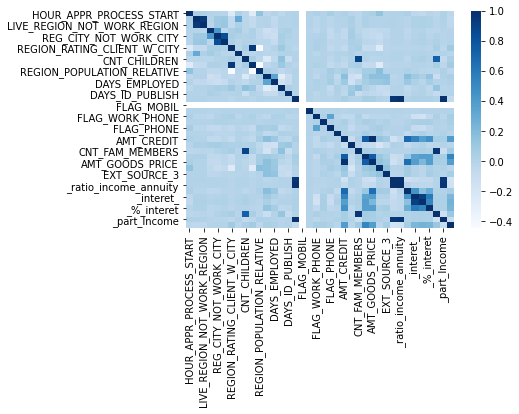

ok - Etape_13    -   10.22  min


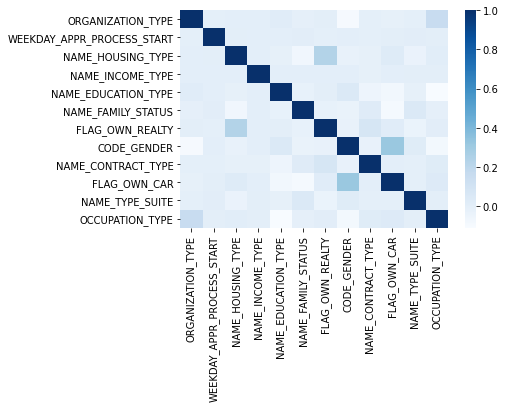

ok   10.23  min
CPU times: user 12min 39s, sys: 6.34 s, total: 12min 46s
Wall time: 10min 14s
time: 10min 14s (started: 2021-09-13 21:54:36 +00:00)


In [25]:
%%time
#    10.23  min
print('-->')


print('Go - Etape_1' )
t0 = _time_now_()
mDataX = mData.copy()

mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX
print('ok - Etape_2    -  ', round(_time_now_()-t0,2),' min'  )

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)
numeric_features,categorical_features = _type_com(X_over)
print('ok - Etape_3    -  ', round(_time_now_()-t0,2),' min'  )

X__cat = X_over[categorical_features]
X__num = X_over[numeric_features]
print(X__cat.shape)
print(X__num.shape)
print('ok - Etape_4    -  ', round(_time_now_()-t0,2),' min'  )

#NUMERIC
# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')
SelectKBest_selected0 = fs.fit(X__num, y_over)
score_selK = pd.DataFrame(SelectKBest_selected0.scores_, columns=['_score_'])
score_selK['_col_'] = X__num.columns
score_selK_ = score_selK.sort_values(by=['_score_'], ascending=False)
print('ok - Etape_5    -  ', round(_time_now_()-t0,2),' min'  )

# CATEG
le = LabelEncoder()
X__catlab = X__cat.apply(le.fit_transform)
fs = SelectKBest(score_func=chi2, k='all')
SelectKBest_selected1 = fs.fit(X__catlab, y_over)
score_selK1 = pd.DataFrame(SelectKBest_selected1.scores_, columns=['_score_'])
score_selK1['_col_'] = X__catlab.columns
score_selK_1 = score_selK1.sort_values(by=['_score_'], ascending=False)
print('ok - Etape_6    -  ', round(_time_now_()-t0,2),' min'  )

# Etape 1 - Process
print('ok - Etape_7    -  ', round(_time_now_()-t0,2),' min'  )
m_St_A = pipe_def_xg_Def.steps[0][1]
mFit_step_A = pd.DataFrame(m_St_A.fit_transform(X_over), columns=get_ct_feature_names(preprocessor))

# Etape 2 - Select K
print('ok - Etape_8    -  ', round(_time_now_()-t0,2),' min'  )
m_St_B = pipe_def_xg_Def.steps[1][1]
mFit_step_B = m_St_B.fit_transform(mFit_step_A, y_over)
column_names = mFit_step_A.columns[m_St_B.get_support()]
mFit_step_B = pd.DataFrame(mFit_step_B, columns=column_names)

# Etape 3 - XGBoost
print('ok - Etape_9    -  ', round(_time_now_()-t0,2),' min'  )
m_St_C = pipe_def_xg_Def.steps[2][1]
mFit_step_C = m_St_C.fit(mFit_step_B, y_over)
f_e_ = pd.DataFrame(mFit_step_C.feature_importances_)
column_names_fe = pd.DataFrame(mFit_step_B.columns)

print('ok - Etape_10    -  ', round(_time_now_()-t0,2),' min'  )


plt.figure(figsize = (10, 10))
_step_B_Corr = mFit_step_B.corr()
sns.heatmap(_step_B_Corr, cmap="Blues")
plt.show()

print('ok - Etape_11    -  ', round(_time_now_()-t0,2),' min'  )

plt.figure(figsize = (20, 20))
_step_A_Corr = mFit_step_A.corr()
sns.heatmap(_step_A_Corr, cmap="Blues")
plt.show()

print('ok - Etape_12    -  ', round(_time_now_()-t0,2),' min'  )

SelectKBest_selected1 = fs.fit_transform(X__catlab, y_over)
X__num_cor = X__num.corr()
sns.heatmap(X__num_cor, cmap="Blues")
plt.show()

print('ok - Etape_13    -  ', round(_time_now_()-t0,2),' min'  )


X__catlab_cor = X__catlab.corr()
sns.heatmap(X__catlab_cor, cmap="Blues")
plt.show()

print('ok  ', round(_time_now_()-t0,2),' min'  )


# TEST VARIABLE IMPORTANCE

In [29]:
%%time

mData.columns


print('-->')
mDataX = mData.copy()

z = mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX


oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)

# Etape 1 - Process
print('ok - Etape_7')
m_St_A = pipe_def_xg_Def.steps[0][1]
mFit_step_A = pd.DataFrame(m_St_A.fit_transform(X_over), columns=get_ct_feature_names(preprocessor))

# Etape 2 - Select K
print('ok - Etape_8 ' )
m_St_B = pipe_def_xg_Def.steps[1][1]
mFit_step_B = m_St_B.fit_transform(mFit_step_A, y_over)
column_names = mFit_step_A.columns[m_St_B.get_support()]
mFit_step_B = pd.DataFrame(mFit_step_B, columns=column_names)

#mFit_step_T = pd.DataFrame(mFit_step_B, columns=column_names)
#print(mFit_step_T.shape)
mFit_step_B

mFit_step_A.columns

mFit_step_B.columns
mFit_step_B = mFit_step_B.rename(columns={
"HOUR_APPR_PROCESS_START" : "Delais_traitement_dossier",
"REG_CITY_NOT_WORK_CITY" : "Lieux_de_Vie_1",
"REGION_RATING_CLIENT_W_CITY" : "Score_Region_1",
"REGION_POPULATION_RELATIVE" : "Population_region",
"DAYS_REGISTRATION" : "Jour_demande",
"FLAG_WORK_PHONE" : "Info_tel_pro",
"AMT_GOODS_PRICE" : "Mnt_credit",
"_ratio_income_annuity" : "Prop_revenu_",
"_interet_par_année_" : "Interet_annuel",
"ORGANIZATION_TYPE_Bank" : "Pro_Bank_",
"ORGANIZATION_TYPE_Construction" : "Pro_Construction",
"ORGANIZATION_TYPE_Medicine" : "Pro_Medical",
"ORGANIZATION_TYPE_School" : "Pro_Scolaire",
"NAME_HOUSING_TYPE_Other" : "Pro_Autre",
"NAME_EDUCATION_TYPE_Higher" : "Diplome_Bac4",
"NAME_EDUCATION_TYPE_Secondary" : "Diplome_Bac2",
"NAME_FAMILY_STATUS_Married" : "Status_Marié",
"NAME_FAMILY_STATUS_Widow" : "Status_veufve",
"NAME_CONTRACT_TYPE_Cash loans" : "Type_Cash",
"FLAG_OWN_CAR_N" : "Pas_de_voiture",
"OCCUPATION_TYPE_CSP_3]" : "CSP_3",
"REG_CITY_NOT_LIVE_CITY" : "Lieux_de_Vie_2",
"LIVE_CITY_NOT_WORK_CITY" : "Lieux_de_Vie_3",
"REGION_RATING_CLIENT" : "Score_Region_2",
"DAYS_BIRTH" : "Age",
"DAYS_ID_PUBLISH" : "Info_Correction",
"FLAG_PHONE" : "Info_tel",
"EXT_SOURCE_2" : "Donnée_Ext_2",
"_duree_credit_" : "Durée_credit",
"_part_Income" : "Prop_revenu_foyer",
"ORGANIZATION_TYPE_Business Entity Type 3" : "Pro_Buizness",
"ORGANIZATION_TYPE_Government" : "Pro_Serv_Public",
"ORGANIZATION_TYPE_Police" : "Pro_Police",
"ORGANIZATION_TYPE_Self-employed" : "Pro_Indépandant",
"NAME_HOUSING_TYPE_apartment/house" : "type_logement",
"NAME_EDUCATION_TYPE_Low" : "Diplome_Bac",
"NAME_FAMILY_STATUS_Civil marriage" : "Status_PACS",
"NAME_FAMILY_STATUS_Single / not married" : "Status_Celib",
"CODE_GENDER_F" : "Femme",
"NAME_CONTRACT_TYPE_Revolving loans" : "Type_Revolving",
"FLAG_OWN_CAR_Y" : "Possede_Voiture",
"DAYS_EMPLOYED" : "Ancienneté",
"AMT_INCOME_TOTAL" : "Revenu_Total",
"AMT_CREDIT" : "Montant_Credit",
"EXT_SOURCE_3" : "Donnée_Ext_3",
"_interet_" : "Taux_interet",
"endettement" : "Endettement",
"DAYS_LAST_PHONE_CHANGE" : "Nouveau_Téléphone",
"CODE_GENDER_M" : "Homme",
"OCCUPATION_TYPE_CSP_1" : "CSP_1"
}) 

time: 67.1 ms (started: 2021-09-13 22:13:49 +00:00)


# Tst LIME/Shape - For Explained

In [30]:
X_a = mFit_step_B.copy()

y_over.shape

def as_pyplot_fig(self, label=1, figsize=(20,20), **kwargs):
        import matplotlib.pyplot as plt
        exp = self.as_list(label=label, **kwargs)
        fig = plt.figure(figsize=figsize)
        vals = [x[1] for x in exp]
        names = [x[0] for x in exp]
        vals.reverse()
        names.reverse()
        colors = ['green' if x > 0 else 'red' for x in vals]
        pos = np.arange(len(exp)) + .5
        plt.barh(pos, vals, align='center', color=colors)
        plt.yticks(pos, names)
        if self.mode == "classification":
            title = 'Local explanation for class %s' % self.class_names[label]
        else:
            title = 'Local explanation'
        plt.title(title)
        return fig
    
m_App_All = pd.read_csv('../input/m-a-p-p-all/mData_all.csv')
m_App_All = m_App_All.sort_values(by=['_ID_'], ascending=True)
m_App_All = m_App_All.reset_index()
m_App_All.pop('index')

time: 59.4 ms (started: 2021-09-13 22:13:49 +00:00)


In [14]:
# time: 14min

mDataX = m_App_All.copy()

z = mDataX.pop('_ID_')
y = mDataX.pop('TARGET')
X = mDataX

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

numeric_features,categorical_features = _type_com(X)

print("X_train   " , X_train.shape)
print("X_test   " , X_test.shape)
print("y_train   " , y_train.shape)
print("y_test   " , y_test.shape)


print('go --->')
numeric_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
                                    ('quantile', QuantileTransformer())])
print('numeric_transformer ---> ok ')
categorical_transformer = Pipeline([('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                                    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
print('categorical_transformer ---> ok ')
preprocessor = ColumnTransformer(transformers=[('int', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

params = {'alpha': 0.23577333450393564, 
          'gamma': 0.1498597113894086, 
          'learning_rate': 0.20589612291341375, 
          'max_depth': 5, 
          'min_child_weight': 4, 
          'subsample': 0.8}

print('preprocessor ---> ok ')
steps=[('transform', preprocessor),('selector', SelectKBest(k=50)),
        ('classifier', XGBClassifier(objective='binary:logistic',
                                    eval_metric= 'auc', **params))]

pipe_def_xg_Def = Pipeline(steps)
print('Pipeline ---> ok ')
pipe_def_xg_Def.fit(X_train ,y_train)

joblib_file = "exp_model.pkl"  
joblib.dump(pipe_def_xg_Def, joblib_file)


X_train    (506296, 53)
X_test    (126575, 53)
y_train    (506296,)
y_test    (126575,)
go --->
numeric_transformer ---> ok 
categorical_transformer ---> ok 
preprocessor ---> ok 
Pipeline ---> ok 


['exp_model.pkl']

time: 17min 17s (started: 2021-09-14 09:14:05 +00:00)


In [15]:
# Wall time: 27min 29s

print('-->')
mDataX = m_App_All.copy()

z = mDataX.pop('_ID_')
y = mDataX.pop('TARGET')
X = mDataX


oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)

# Etape 1 - Process
print('ok - Etape_7')
m_St_A = pipe_def_xg_Def.steps[0][1]
mFit_step_A = pd.DataFrame(m_St_A.fit_transform(X_over), columns=get_ct_feature_names(preprocessor))

# Etape 2 - Select K
print('ok - Etape_8 ' )
m_St_B = pipe_def_xg_Def.steps[1][1]
mFit_step_B = m_St_B.fit_transform(mFit_step_A, y_over)
column_names = mFit_step_A.columns[m_St_B.get_support()]
mFit_step_B = pd.DataFrame(mFit_step_B, columns=column_names)


new_step_B = mFit_step_B.head(356255)
print(new_step_B.shape)

-->
ok - Etape_7
ok - Etape_8 
(356255, 50)
time: 30min 59s (started: 2021-09-14 09:31:22 +00:00)


In [16]:
# Etape 3 - XGB for Export
mTest_model = pipe_def_xg_Def.steps[2][1]

time: 9.7 ms (started: 2021-09-14 10:02:21 +00:00)


In [17]:
# Export new_model
joblib_file = "mTest_model.pkl"  
joblib.dump(mTest_model, joblib_file)

['mTest_model.pkl']

time: 62.8 ms (started: 2021-09-14 10:02:21 +00:00)


In [19]:
mtest = pd.read_csv('../input/m-a-p-p-all/mData_all.csv')
mtest

HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                            10                           0   
1                            11                           0   
2                             9                           0   
3                            17                           0   
4                            11                           0   
...                         ...                         ...   
356250                       16                           0   
356251                       11                           0   
356252                       12                           0   
356253                       10                           1   
356254                       14                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
356250                            0                       0   
356251                            0                       0   
356252                            0                       0   
356253                            1                       0   
356254                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            1                        1   
...                        ...                      ...   
356250                       0                        0   
356251                       1                        1   
356252                       0                        0   
356253                       1                        1   
356254                       0                        0   

        REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  CNT_CHILDREN  \
0                                 2                           0             0   
1                                 1                           0             0   
2                                 2                           0             0   
3                                 2                           0             0   
4                                 2                           0             0   
...                             ...                         ...           ...   
356250                            3                           0             0   
356251                            2                           0             2   
356252                            2                           0             1   
356253                            2                           0             0   
356254                            2                           0             0   

        REGION_RATING_CLIENT  ...  _interet_par_année_  _%_interet  _part_  \
0                          2  ...          3377.507360        1.20     1.0   
1                          1  ...          4526.193994        2.86     2.0   
2                          2  ...             0.000000        0.00     1.0   
3                          2  ...          1488.917788        2.10     2.0   
4                          2  ...             0.000000        0.00     1.0   
...                      ...  ...                  ...         ...     ...   
356250                     3  ...          6037.963351        0.68     1.0   
356251                     2  ...          6532.134007        0.95     3.0   
356252                     2  ...             0.000000        0.00     2.5   
356253                     2  ..

time: 3.61 s (started: 2021-09-14 10:10:50 +00:00)


In [20]:
# Export data_frame
print('---->')
data_prz_after_pipeline = mtest.copy()
mTest_df = data_prz_after_pipeline.head(356255)
mTest_df

---->


HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                            10                           0   
1                            11                           0   
2                             9                           0   
3                            17                           0   
4                            11                           0   
...                         ...                         ...   
356250                       16                           0   
356251                       11                           0   
356252                       12                           0   
356253                       10                           1   
356254                       14                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
356250                            0                       0   
356251                            0                       0   
356252                            0                       0   
356253                            1                       0   
356254                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            1                        1   
...                        ...                      ...   
356250                       0                        0   
356251                       1                        1   
356252                       0                        0   
356253                       1                        1   
356254                       0                        0   

        REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  CNT_CHILDREN  \
0                                 2                           0             0   
1                                 1                           0             0   
2                                 2                           0             0   
3                                 2                           0             0   
4                                 2                           0             0   
...                             ...                         ...           ...   
356250                            3                           0             0   
356251                            2                           0             2   
356252                            2                           0             1   
356253                            2                           0             0   
356254                            2                           0             0   

        REGION_RATING_CLIENT  ...  _interet_par_année_  _%_interet  _part_  \
0                          2  ...          3377.507360        1.20     1.0   
1                          1  ...          4526.193994        2.86     2.0   
2                          2  ...             0.000000        0.00     1.0   
3                          2  ...          1488.917788        2.10     2.0   
4                          2  ...             0.000000        0.00     1.0   
...                      ...  ...                  ...         ...     ...   
356250                     3  ...          6037.963351        0.68     1.0   
356251                     2  ...          6532.134007        0.95     3.0   
356252                     2  ...             0.000000        0.00     2.5   
356253                     2  ..

time: 244 ms (started: 2021-09-14 10:11:13 +00:00)


In [21]:
# time: 14.8 s
mTest_df.to_csv("mTest_df.csv",index=False)

time: 14.8 s (started: 2021-09-14 10:11:31 +00:00)


In [23]:
m_App_All = mtest.copy()
mTest_ID = pd.DataFrame(m_App_All["_ID_"])
mTest_ID.to_csv('mTest_ID.csv',index=False)
mTest_ID

_ID_
0       100002
1       100003
2       100004
3       100006
4       100007
...        ...
356250  456221
356251  456222
356252  456223
356253  456224
356254  456250

[356255 rows x 1 columns]

time: 748 ms (started: 2021-09-14 10:12:10 +00:00)


# Generer les données pour le dashboard

In [24]:
import joblib
import pickle

mTest_model = joblib.load('../input/data-for-d/mTest_model.pkl')

pickle.dump(mTest_model, open("mTest_model.pickle.dat", "wb"))

time: 48.5 ms (started: 2021-09-14 10:12:15 +00:00)


In [25]:
m_App_All = pd.read_csv('../input/m-a-p-p-all/mData_all.csv')
m_App_All = m_App_All.sort_values(by=['_ID_'], ascending=True)
m_App_All = m_App_All.reset_index()
m_App_All.pop('index')

mA = m_App_All.head(167)
mA

HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                         18                           0   
1                         10                           0   
2                         11                           0   
3                          9                           0   
4                          9                           0   
..                       ...                         ...   
162                       11                           0   
163                       17                           0   
164                       16                           0   
165                        8                           0   
166                       16                           0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
..                           ...                     ...   
162                            0                       0   
163                            0                       0   
164                            0                       0   
165                            0                       0   
166                            0                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
..                      ...                      ...   
162                       0                        0   
163                       0                        0   
164                       0                        0   
165                       1                        1   
166                       1                        1   

     REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  CNT_CHILDREN  \
0                              2                           0             0   
1                              2                           0             0   
2                              1                           0             0   
3                              2                           0             0   
4                              2                           0             0   
..                           ...                         ...           ...   
162                            3                           0             0   
163                            3                           0             1   
164                            2                           0             0   
165                            2                           0             3   
166                            2                           0             0   

     REGION_RATING_CLIENT  ...  _interet_par_année_  _%_interet  _part_  \
0                       2  ...          4294.281646        1.32     2.0   
1                       2  ...          3377.507360        1.20     1.0   
2                       1  ...          4526.193994        2.86     2.0   
3                       2  ...             0.000000        0.00     1.0   
4                       2  ...          3334.770524        0.67     2.0   
..                    ...  ...                  ...         ...     ...   
162                     3  ...          3447.841210        1.60     1.0   
163                     3  ...          2174.780950        1.87     2.5   
164                     2  ...          4509.647967        2.87     2.0   
165                     2  ...          1777.277385        0.86     3.5   
166                     2  ...             0.000000        0.00     2.0   

      _part_Income  endettement  Cluster_doc  Cluste

time: 3.74 s (started: 2021-09-14 10:12:19 +00:00)


# SHAP explain

In [42]:
# time: 1min 32s 
# Test Methode before export
mTest_df = pd.read_csv('../input/-mtest/mTest_df.csv')
mTest_ID = pd.read_csv('../input/-mtest/mTest_ID.csv')
mTest_model = joblib.load('../input/-mtest/mTest_model.pkl')

print(mTest_ID.shape)
print(mTest_df.shape)

# Etape 1
print('--->')
explainer = shap.Explainer(mTest_model)
shap_values = explainer(mTest_df)

print('--->')
def _shape_graph(id):
    a = pd.DataFrame(shap_values.values, columns=mTest_df.columns)
    b = a.reset_index()
    c = pd.DataFrame(b['index'])
    d = c.join(mTest_ID)
    e = d.dropna()
    index = np.where((e._ID_ == id))
    index = index[0][0]
    if index == 0:
        one = 0
        two = 1
    else:
        one = index - 1
        two = index
    return shap.plots.bar(shap_values[index], show=False)


def _shape_sc(id):
    a = pd.DataFrame(shap_values.values, columns=mTest_df.columns)
    b = a.reset_index()
    c = pd.DataFrame(b['index'])
    d = c.join(mTest_ID)
    e = d.dropna()
    index = np.where((e._ID_ == id))
    index = index[0][0]
    if index == 0:
        one = 0
        two = 1
    else:
        one = index - 1
        two = index
    sc_ = mTest_model.predict_proba(mTest_df[one:two])
    sc_for_1 = sc_[0][0]
    return sc_for_1

print('k')

(356255, 1)
(356255, 50)
--->
--->
k
time: 1min 32s (started: 2021-09-14 10:19:15 +00:00)


======== score ======
0.78387326
========     ======


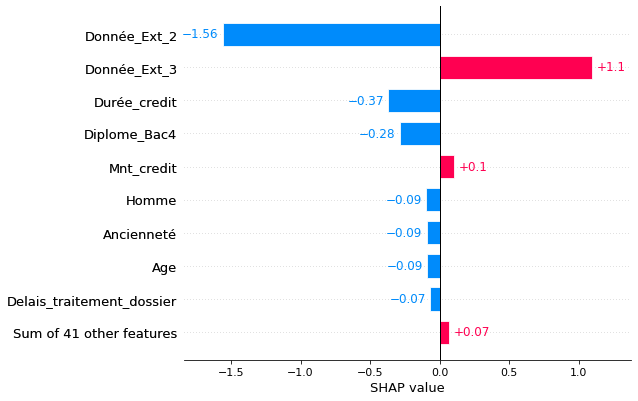

time: 865 ms (started: 2021-09-14 10:20:48 +00:00)


In [43]:
# time: 865 ms
print('======== score ======')
print(_shape_sc(100001))
print('========     ======')
_shape_graph(100001)

======== score ======
0.78387326
========     ======


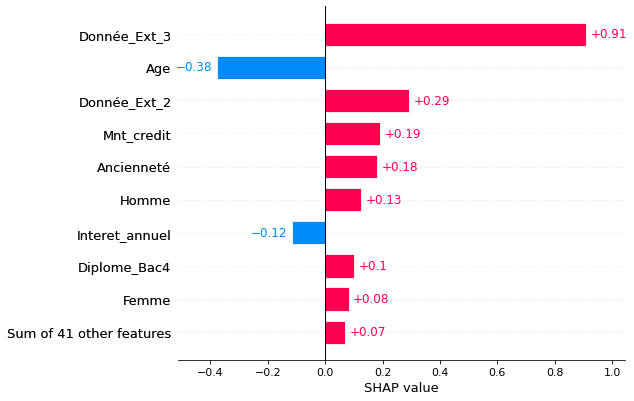

time: 853 ms (started: 2021-09-14 10:20:49 +00:00)


In [44]:
# time 1s
print('======== score ======')
print(_shape_sc(100002))
print('========     ======')
_shape_graph(100002)

# LIME explain

In [45]:
# Wall time: 50.3 s
print('-->')

X_a = new_step_B.copy()
print(X_a.shape)

params = {'alpha': 0.23577333450393564, 
          'gamma': 0.1498597113894086, 
          'learning_rate': 0.20589612291341375, 
          'max_depth': 5, 
          'min_child_weight': 4, 
          'subsample': 0.8}

model = XGBClassifier(objective='binary:logistic',eval_metric= 'auc', **params)


X_a = pd.DataFrame(X_a)

y_a = y_over.copy()
y_a = pd.DataFrame(y_a)
y_a = y_a.head(356255)
print(y_a.shape)
 
model.fit(X_a, y_a)

def prob(data):
    return np.array(list(zip(1-model.predict_proba(data)[:,1],model.predict_proba(data)[:,1])))
    
explainer = lime.lime_tabular.LimeTabularExplainer(X_a[list(X_a.columns)].astype(int).values,  
                                                   mode='classification',
                                                   training_labels=y_a['TARGET'],
                                                   feature_names=list(X_a.columns))

i = 1
exp = explainer.explain_instance(X_a.loc[i,X_a.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

-->
(356255, 50)
(356255, 1)


CPU times: user 3min 12s, sys: 1.05 s, total: 3min 13s
Wall time: 1min
time: 1min (started: 2021-09-14 10:20:50 +00:00)


In [46]:
# time: 28.6 s
for i in range(0,5):
    exp = explainer.explain_instance(X_a.loc[i,X_a.columns].astype(int).values, prob, num_features=10)
    exp.show_in_notebook(show_table=True)

time: 28.6 s (started: 2021-09-14 10:26:31 +00:00)


go


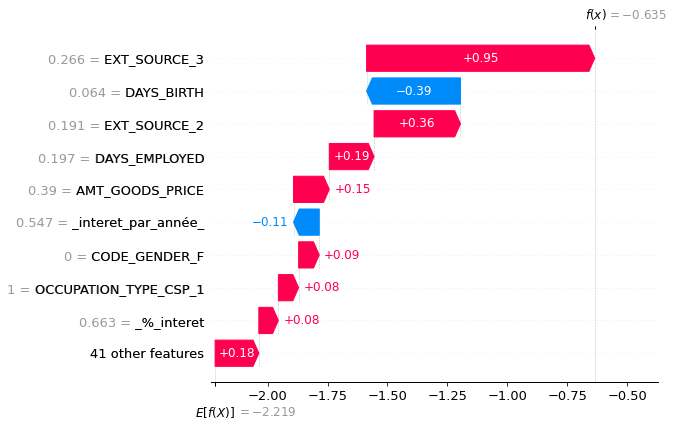

CPU times: user 5min 47s, sys: 955 ms, total: 5min 48s
Wall time: 1min 30s
time: 1min 30s (started: 2021-09-14 10:31:47 +00:00)


In [47]:
# time: 1min 30s

print('go')

mData_for_a = new_step_B.copy()


index = 1
explainer = shap.Explainer(model)

shap_values = explainer(mData_for_a)
shap.plots.waterfall(shap_values[index])

#shap_values[1][0]
#shap_df = pd.DataFrame(shap_values[1])
#shap_df

In [48]:
shap_values_1 = explainer(mData_for_a)

time: 1min 28s (started: 2021-09-14 10:33:27 +00:00)


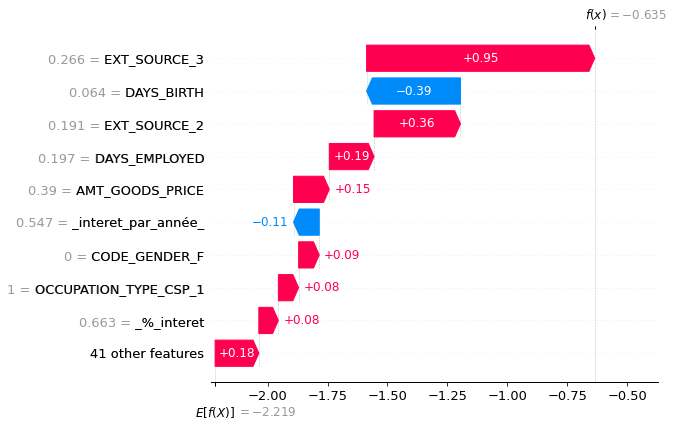

time: 893 ms (started: 2021-09-14 10:38:38 +00:00)


In [50]:
shap.plots.waterfall(shap_values[1])

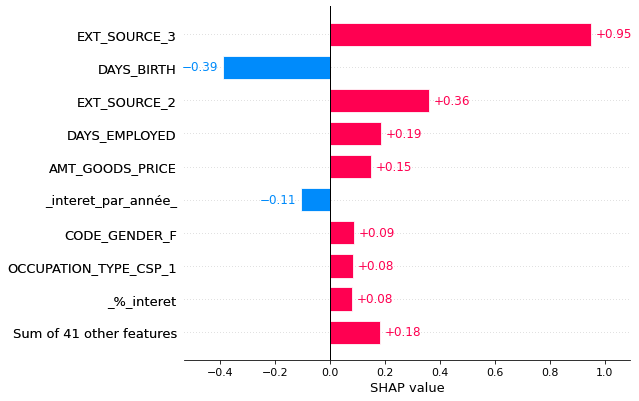

time: 293 ms (started: 2021-09-14 10:38:55 +00:00)


In [51]:
shap.plots.bar(shap_values[1])


base value is [[0.16879314 0.83120686]]


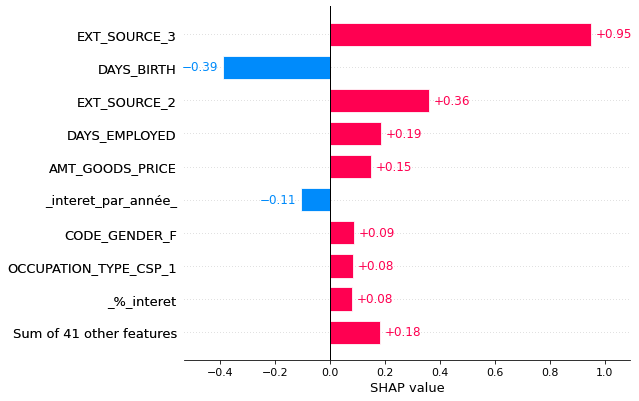

time: 1.38 s (started: 2021-09-14 10:39:05 +00:00)


In [52]:
#Wall time: time: 44min 53s 

mDataX = m_App_All.copy()

z = mDataX.pop('_ID_')
y = mDataX.pop('TARGET')
X = mDataX

sc_ = pipe_def_xg_Def.predict_proba(X[1:2])

print( 'base value is %s' % sc_ )


explainer = shap.Explainer(model)

shap_values = explainer(mData_for_a[1:2])
shap.plots.bar(shap_values[0])

go


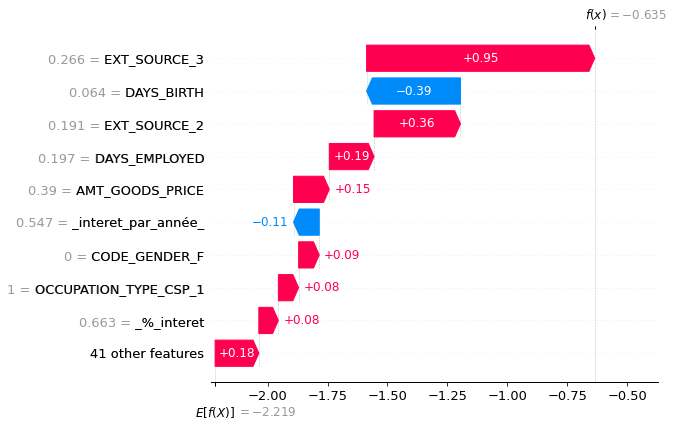

CPU times: user 1.4 s, sys: 684 ms, total: 2.08 s
Wall time: 1.12 s
time: 1.13 s (started: 2021-09-14 10:39:12 +00:00)


In [53]:
%%time

print('go')

mData_for_a = new_step_B.copy()


index = 1
explainer = shap.Explainer(model)

shap_values = explainer(mData_for_a[1:2])
shap.plots.waterfall(shap_values[0])

#shap_values[1][0]
#shap_df = pd.DataFrame(shap_values[1])
#shap_df

In [56]:
m_App_All = pd.read_csv('../input/m-a-p-p-all/mData_all.csv')
m_App_All = m_App_All.sort_values(by=['_ID_'], ascending=True)
m_App_All = m_App_All.reset_index()
m_App_All.pop('index')
m_App_All.to_csv('data_prez.csv', index=False)

time: 18.1 s (started: 2021-09-14 10:39:44 +00:00)


# Reprise Feature Imp avant Pipeline pour Presm

In [1]:
mDataX.to_csv('mDataX.csv', index=False)

NameError: name 'mDataX' is not defined

In [64]:
%%time
print('-->')


print('Go - Etape_1' )
t0 = _time_now_()
mDataX = mData.copy()


mDataX.pop('SK_ID_CURR')
y = mDataX.pop('TARGET')
X = mDataX
print('ok - Etape_2    -  ', round(_time_now_()-t0,2),' min'  )

oversample = RandomOverSampler(sampling_strategy=0.99)
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)
numeric_features,categorical_features = _type_com(X_over)
print('ok - Etape_3    -  ', round(_time_now_()-t0,2),' min'  )

X__cat = X_over[categorical_features]
X__num = X_over[numeric_features]
print(X__cat.shape)
print(X__num.shape)
print('ok - Etape_4    -  ', round(_time_now_()-t0,2),' min'  )

#NUMERIC
# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')
SelectKBest_selected0 = fs.fit(X__num, y_over)
score_selK = pd.DataFrame(SelectKBest_selected0.scores_, columns=['_score_'])
score_selK['_col_'] = X__num.columns
score_selK_ = score_selK.sort_values(by=['_score_'], ascending=False)
print('ok - Etape_5    -  ', round(_time_now_()-t0,2),' min'  )

# CATEG
le = LabelEncoder()
X__catlab = X__cat.apply(le.fit_transform)
fs = SelectKBest(score_func=chi2, k='all')
SelectKBest_selected1 = fs.fit(X__catlab, y_over)
score_selK1 = pd.DataFrame(SelectKBest_selected1.scores_, columns=['_score_'])
score_selK1['_col_'] = X__catlab.columns
score_selK_1 = score_selK1.sort_values(by=['_score_'], ascending=False)
print('ok - Etape_6    -  ', round(_time_now_()-t0,2),' min'  )

# Etape 1 - Process
print('ok - Etape_7    -  ', round(_time_now_()-t0,2),' min'  )
m_St_A = pipe_def_xg_Def.steps[0][1]
mFit_step_A = pd.DataFrame(m_St_A.fit_transform(X_over), columns=get_ct_feature_names(preprocessor))

# Etape 2 - Select K
print('ok - Etape_8    -  ', round(_time_now_()-t0,2),' min'  )
m_St_B = pipe_def_xg_Def.steps[1][1]
mFit_step_B = m_St_B.fit_transform(mFit_step_A, y_over)
column_names = mFit_step_A.columns[m_St_B.get_support()]
mFit_step_B = pd.DataFrame(mFit_step_B, columns=column_names)

# Etape 3 - XGBoost
print('ok - Etape_9    -  ', round(_time_now_()-t0,2),' min'  )
m_St_C = pipe_def_xg_Def.steps[2][1]
mFit_step_C = m_St_C.fit(mFit_step_B, y_over)
f_e_ = pd.DataFrame(mFit_step_C.feature_importances_)
column_names_fe = pd.DataFrame(mFit_step_B.columns)

print('ok - Etape_10    -  ', round(_time_now_()-t0,2),' min'  )




-->
Go - Etape_1
ok - Etape_2    -   0.0  min
ok - Etape_3    -   0.14  min
(362327, 12)
(362327, 38)
ok - Etape_4    -   0.14  min
ok - Etape_5    -   0.15  min
ok - Etape_6    -   0.18  min
ok - Etape_7    -   0.18  min
ok - Etape_8    -   7.61  min
ok - Etape_9    -   7.63  min
ok - Etape_10    -   8.37  min
CPU times: user 10min 31s, sys: 4.07 s, total: 10min 35s
Wall time: 8min 22s
time: 8min 22s (started: 2021-09-14 10:54:09 +00:00)


In [ ]:
plt.figure(figsize = (10, 10))
_step_B_Corr = mFit_step_B.corr()
sns.heatmap(_step_B_Corr, cmap="Blues")
plt.show()

print('ok - Etape_11    -  ', round(_time_now_()-t0,2),' min'  )

plt.figure(figsize = (20, 20))
_step_A_Corr = mFit_step_A.corr()
sns.heatmap(_step_A_Corr, cmap="Blues")
plt.show()

print('ok - Etape_12    -  ', round(_time_now_()-t0,2),' min'  )

SelectKBest_selected1 = fs.fit_transform(X__catlab, y_over)
X__num_cor = X__num.corr()
sns.heatmap(X__num_cor, cmap="Blues")
plt.show()

print('ok - Etape_13    -  ', round(_time_now_()-t0,2),' min'  )


X__catlab_cor = X__catlab.corr()
sns.heatmap(X__catlab_cor, cmap="Blues")
plt.show()

print('ok  ', round(_time_now_()-t0,2),' min'  )
